## **Sarah Abraham - 9231**

# **ML Experiment 3**

Q1 Effect of toxic substances on insects

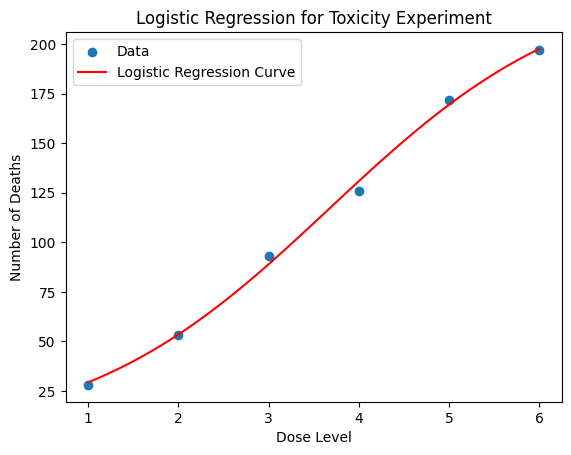

In [8]:
#Exercise 1
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))


dose_levels = np.array([1, 2, 3, 4, 5, 6])
deaths = np.array([28, 53, 93, 126, 172, 197])

initial_guess = [200, 1, 4]


params, covariance = curve_fit(logistic_function, dose_levels, deaths, p0=initial_guess)
L, k, x0 = params

x_values = np.linspace(min(dose_levels), max(dose_levels), 100)

predicted_deaths = logistic_function(x_values, L, k, x0)

plt.scatter(dose_levels, deaths, label="Data")
plt.plot(x_values, predicted_deaths, label="Logistic Regression Curve", color='red')
plt.xlabel("Dose Level")
plt.ylabel("Number of Deaths")
plt.title("Logistic Regression for Toxicity Experiment")
plt.legend()
plt.show()

Q2 Alcohol consumption among students


In [1]:
#Exercise 2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('student-mat.csv')
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [2]:
df.shape

(395, 33)

In [3]:
df.count()

school        395
sex           395
age           395
address       395
famsize       395
Pstatus       395
Medu          395
Fedu          395
Mjob          395
Fjob          395
reason        395
guardian      395
traveltime    395
studytime     395
failures      395
schoolsup     395
famsup        395
paid          395
activities    395
nursery       395
higher        395
internet      395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
dtype: int64

In [28]:
X = df['age']
y = df['Dalc']

In [31]:
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

In [33]:
print("Logistic Equation:")
print(f"Probability = {L} / (1 + exp(-{k} * (x - {x0})))")

Logistic Equation:
Probability = 1.5753424681948722 / (1 + exp(-605.4889756304857 * (x - 3.994184054911573)))


Q3 Predicting whether SUV will be purchased

In [34]:
#Exercise 3
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
df.shape

(400, 5)

In [24]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [29]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(X_test_scaled)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8625


In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[50  2]
 [ 9 19]]
